In [1]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('../data/train.csv')
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (4269, 13)


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


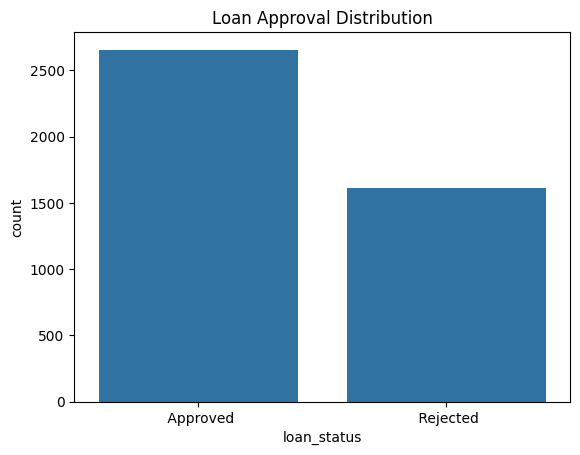

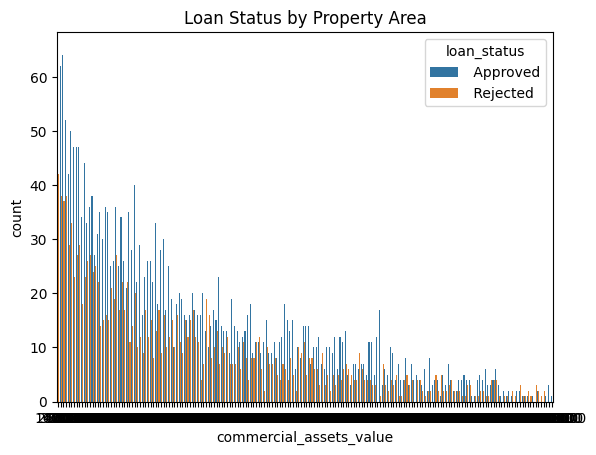

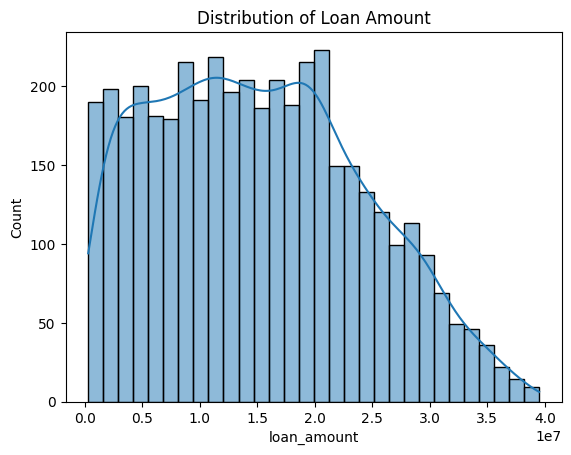

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Strip any whitespace from column names
df.columns = df.columns.str.strip()

# Loan approval count
sns.countplot(x='loan_status', data=df)
plt.title('Loan Approval Distribution')
plt.show()

# Property area vs Loan Status
sns.countplot(x='commercial_assets_value', hue='loan_status', data=df)
plt.title('Loan Status by Property Area')
plt.show()

# Distribution of Loan Amount
sns.histplot(df['loan_amount'], bins=30, kde=True)
plt.title('Distribution of Loan Amount')
plt.show()


In [9]:

# Check the data types of the columns
print("Data types of the columns:")
print(df.dtypes)

Data types of the columns:
loan_id                      int64
no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object


In [10]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
le = LabelEncoder()

categorical_cols = [ 'no_of_dependents', 'education',
                    'self_employed', 'commercial_assets_value','luxury_assets_value','bank_asset_value' ,'loan_status']

for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,175,224,80,0
1,2,0,1,1,4100000,12200000,8,417,2700000,22,85,33,1
2,3,3,0,0,9100000,29700000,20,506,7100000,45,330,127,1
3,4,3,0,0,8200000,30700000,8,467,18200000,33,230,79,1
4,5,5,1,1,9800000,24200000,20,382,12400000,82,291,50,1


In [13]:
X = df_encoded.drop('loan_status', axis=1)
y = df_encoded['loan_status']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    scores[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")


Logistic Regression Accuracy: 0.8197
Decision Tree Accuracy: 0.9731
Random Forest Accuracy: 0.9766


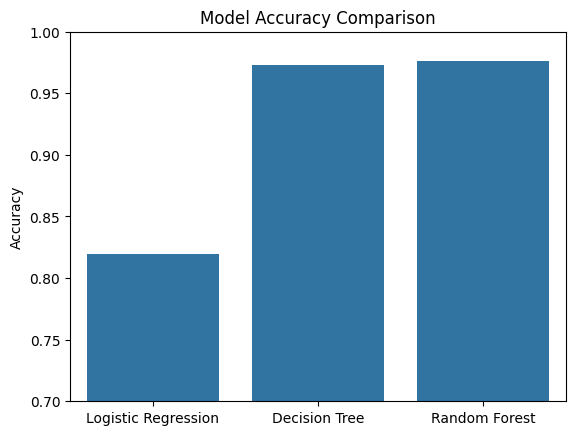

In [15]:
sns.barplot(x=list(scores.keys()), y=list(scores.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1)
plt.show()


In [16]:
import joblib

best_model_name = max(scores, key=scores.get)
best_model = models[best_model_name]

joblib.dump(best_model, '../model/loan_model.pkl')
print(f"✅ Saved best model: {best_model_name}")


✅ Saved best model: Random Forest
